## Exercises chapter 6.3 (Theis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expi
def W(u): return -expi(-u) # Theis well function

### Theis type curve

There are four ways to implement the Theis well function $W(u)$

1. Using scipy.special.expi()
1. Integrating the integral form of the Theis solution
1. Implementing the power series form of the Theis solution.
1. Approximate the well function by its logarithmic form.

Implement all four ways and show them in the same graph as type curves
1. On double log scale versus 1/u
1. On semi log scale versus 1/u

### Theis drawdown and radius of influence

Compute the Theis drawdown

+ $Q = 1200$ m3/d
+ $kD = 900$ m2/d
+ $S_y = 0.2$ 
+ $t =$ np.logspace(-3, 2, 51)

and show it as a function of r on semi-log scale

1. Using one of the exact implementations
2. Using the approximate expression.
3. Plot in this figure the radius of influence. That is plot for all times a marker on coordinate $(r, z=0)$

### Bouwput (superposition in space)

A square building excavation of 50 x 50 m has to be pumped dry to be able to work in it. For this, the level of the water table aquifer has to be lowered by 4 m. The plan is to use four well at the corners of the pit. the pit has to remain dry for 6 months. The aquifer has a transmissivity of $kD = 600$ m2/d and a specific yield of $S_y = 0.2$.

The plan is to use wells with a capacity of Q = 1200 m3/d.

As a criterion for reaching the required drawdown, use the drawdown at the center of the building pit.

1. How long before the pit has to be dry must the pumping start?
2. After the desired drawdown has been reached, the pump capacity may be reduced.
    Assume that the pumps run as computed for 1 week more than the initial pumping period.
    Assume that the pumps will be run at a fixed lower flow thereafter.
    What has to be the pump capacity for the remaining period, such that the desired drawdown is maintained till the end of the construction period?
    


### Well along river, discharge from river

A well is installed at some distance from a straight river. Position the y-axis along the river and the x-axis perpendicular to it. Assume the contact between the water table aquifer and the river is direct.

Use the following data

+ $kD = 900$ m2/d
+ $S_y = 0.23$
+ $x_w = 500$ m, the x-coordinate of the well, $y_w=0$


1. Derive the specific discharge $q$ [L2/d] in the aquifer at distance $r$ from the well pumping at a flow $Q_0$ since $t=0$ from a water-table aquifer.
2. Compute the specific discharge from or into the aquifer at the river (groundwater-river exchange).
3. Compute this specic discharge at a large number of points along the river.
4. Compute the total exchange between groundwater and the river caused by this well.

### Pumping test

Below are the data obtained for 3 piezometers during a pumping test in a confined aquifer. The discharge is Q = 720 m2/d. The piezometers are at 25, 75 and 150 m from the well. kD = 900 m2/d and Sy = 0.22

The data for this pumping test are given below, measurement times $t_{min}$ in minutes and the drawdown $dd$ as a python dictionary with as keys the distance for the piezometers.


In [2]:
# sampling times in minutes
t_min = np.array([1, 2, 3, 5, 7, 10, 15, 30, 45, 60, 120, 180, 240, 300, 360,
                  420, 480, 540, 600, 1440, 1680, 1800, 1920])

# drawdown at sampling times for the three piezometers
dd = {} # initialize epty dictionary
dd['25'] = np.array([0.044, 0.121, 0.172, 0.280, 0.319, 0.407, 0.502, 0.622, 0.731, 0.820,
           0.968, 1.064, 1.101, 1.131, 1.189, 1.271, 1.270, 1.225, 1.289, 1.459, 1.598, 1.621, 1.590])


dd['75'] = np.array([0.000, 0.000, 0.002, 0.012, 0.027, 0.051, 0.097, 0.188, 0.265, 0.327, 0.492,
           0.549, 0.625, 0.689, 0.708, 0.717, 0.761, 0.819, 0.808, 1.020, 1.006, 1.072, 1.111])

dd['150'] = np.array([0.000, 0.000, 0.000, 0.000, 0.000, 0.001, 0.005, 0.032, 0.062, 0.099, 0.196,
            0.273, 0.329, 0.369, 0.408, 0.443, 0.469, 0.477, 0.506, 0.727, 0.726, 0.759, 0.784])


#### double log

1. Show the drawdown in a double log plot as a function of time t
1. Show the drawdown in a double log plot as a funtion of $t/r^2$
1. Show the drawdown in a semi-log plot as a function of $t$
1. Show the drawdown in a semi-log plot as a function of $t/r^2$

Hint you can plot all four plots on the same figure by using

I defined a function preparePlots to generate a figure with for subplots in an array [2x2] with the proper
axis properties, labels and titles and, especially fontsizes such that they do not overlap.

I was quite some work to figure out how to do that in matplotlib.

In [3]:
def preparePlots():
    """Prepares and returns 4 axes and a figure and plots them (but not yet show them)"""
    
    # default axes properties, specify as dictionaries
    defaults = [{}, {}, {}, {}]
    defaults[0] = {'xlabel':'time [t]', 'ylabel':'dd [m]', 'xscale':'log', 'yscale':'log','title':'drawdown vs time'}
    defaults[1] = {'xlabel':'time [t]', 'ylabel':'dd [m]', 'xscale':'log', 'yscale':'log', 'title':'drawdown vs t/r^2'}
    defaults[2] = {'xlabel':'time [t]', 'ylabel':'dd [m]', 'xscale':'log', 'yscale':'linear', 'title':'drawdown vs time'}
    defaults[3] = {'xlabel':'time [t]', 'ylabel':'dd [m]', 'xscale':'log', 'yscale':'linear', 'title':'drawdown vs t/r^2'}

    # xlabel, ylabel accept fontdict to set properties
    fontdict = {'fontsize':8}

    fig= plt.figure()
    ax = []
    for i in range(4): # geneate four axes on the same figure
        axes = fig.add_subplot(2,2,i+1)  # 4 axes in an array [2x2]
        axes.set(**defaults[i]) # use defaults specified above (** means "unpack dictionary)
        #axes.set_title(defaults[i]['title'], fontdict=fontdict) # alternative way to set title with fontsize
        axes.title.set_fontsize(8) # most clean way to set title fontsize
        axes.set_xlabel(axes.get_xlabel(), fontdict=fontdict) # set fontsize by means of fontdict
        axes.set_ylabel(axes.get_ylabel(), fontdict=fontdict) # same
        axes.tick_params(axis='both', which='major', labelsize=6) # set fontsize of ticks
        ax.append(axes)
    return ax

The next step is to plot the data and the figure and show them with plt.show()

First define a function to compute the drawdown

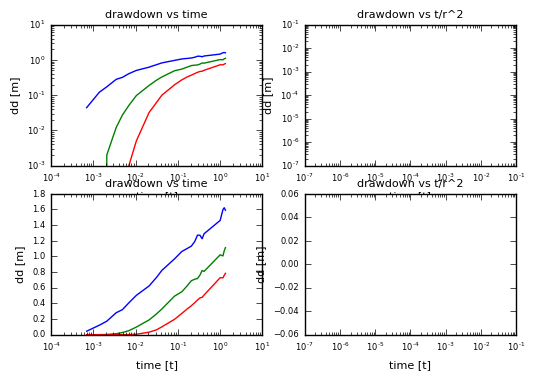

In [4]:
t = t_min/24./60. # [d], sampling times

ax = preparePlots()

# plot the piezometers
for r in [25, 75, 150]:
    ax[0].plot(t, dd[str(r)])
    #ax[1].plt(....)  # adapt to make the plot of t/r**2 vs dd
    ax[2].plot(t, dd[str(r)])
    #ax[3].plt(....)

plt.show()            

Interpret the test on double log scale

+ prepare a double log axes (with labels, title etc
+ plot the data $t/r^2$ vs $dd$
+ use the well fucntion as
+ $ s = A\, W(B \,\frac t {r^2}) $
+ Adapt A and B by trial and error until the data matches the previous expression as well as possible.
+ From the obtained values of A and B determine the $kD$ and the $S_y$



Interpret the test on semi-log scale

+ prepare a semilog axes (with labbles, titles etc)
+ plot the data $t/r^2$ versus $dd$
+ use the simplified (logarithmic) well function
+ determine the $kD$ and $S$ from the change of the $dd$ per log cycle and the intercept of the $dd$ with $dd=0$

### Superposition in time

In Egypt, in the Western Sahara along the desert road from Cairo to Alexandria there are various fruit producing enterprises that pump groundwater for irrigation. One of them is 500 ha, which need 2.0 m irrigation water per year. The southern neighbour, 8 km away cultivates 200 ha, also completely on groundwater, requiring 1.8 m/y. The northern neighbor at 10 m distance cultivates 300 ha, requiring 2.2 m/y. The middle one started cultvation 20 years ago, its southern neighbor, 15 years and its northern neighbor 12 years. The extraction is from the nubian sandstone aquifer, that has a transmissivity of kD=600 m2/d and a storage coefficient S = 0.001. The initial groundwater level was 40 m below ground surface. And the maximum depth of the water table that is still economically viable is 200 m below ground surface.

Compute the drawdowns, assuming the transmissivity and storage coefficients are constant and conclude if and if so when the wells hit the economic lowest water level of 100 m below ground surface. Place the wells near the road and measure the drawdown at 250 m from the well as a representative location for the entire cultivated area.

In an area there are four wells that were constructed one year after the other


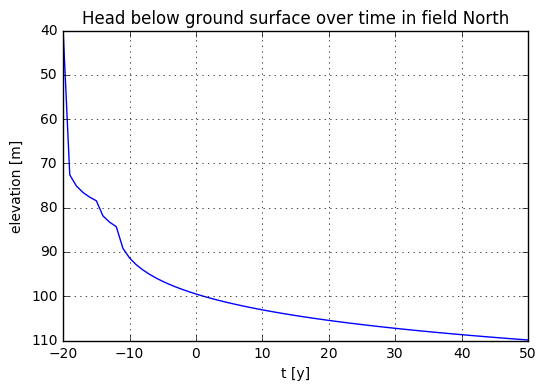

In [15]:
aYear = 365. # days per year
kD = 600 * aYear # m3/y
S = 0.001

"""Data for the three cultivations

There are of course many way to specify the data given above.
One possibility is to specify each data type as an array of 3 values,
one for the South, one for the Central and one for the North cultivations.
This works well here. You only have to index the data to get the correct one.
"""
name = ['South', 'Center', 'North']
hirr = np.array([1.8, 2.0, 2.2])  # irrgation layer per year
area = np.array([2.e6, 5.e6, 3.e6]) # cultivated area
xw = np.array([-8000.,  0., 10000.]) # well coordinate
yw = np.array([    0.,  0.,     0.]) # well coordinate
x0 = np.array([-8000.,  0., 10000.]) # observation point
y0 = np.array([ 250., 250.,   250.])  # observation point
tSt= np.array([ -15., -20.,  -12.])  # start times relative to present in years

t   = np.linspace(-20., 50., 71)  # [years], 70 years of simulation time
Q   = area * hirr # m3/year, yearly extraction of groundwater
r = np.sqrt((xw- x0[1])**2 + (yw - y0[1])**2 ) # distance to central cultivated area (index=1, not 2)

hInit = -40. # initial water level, so we can plot the actual water level below ground surface

s = np.zeros(t.shape) - hInit # start with -hInit as initial groundwater level below ground surface
#for i in range(3):
# Here comes the superposition code
#
#
#

# plot the water level curve
ax = plt.figure().add_subplot(111)
ax.set(xlabel='t [y]', ylabel='m below ground surface',
       title='Water level below ground surface in field {}'.format(name[i]))
ax.grid(True)
ax.invert_yaxis()  # invert the y-axis so that the curve declines when the water level becomes deeper
ax.plot(t, s) # plot the line
plt.show()


